# indicators.py

In [1]:
import vectorbt as vbt
from vectorbt.utils import *

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from numba import njit, f8, i8, b1, optional

In [3]:
index = pd.Index([
    datetime(2018, 1, 1),
    datetime(2018, 1, 2),
    datetime(2018, 1, 3),
    datetime(2018, 1, 4),
    datetime(2018, 1, 5),
    datetime(2018, 1, 6),
    datetime(2018, 1, 7)
])
columns = ['a', 'b', 'c']
ts = pd.DataFrame({
    'a': [1, 2, 3, 4, 5, 6, np.nan], 
    'b': [np.nan, 6, 5, 4, 3, 2, 1],
    'c': [1, 2, 3, np.nan, 3, 2, 1]}, index=index).astype(np.float64)

print(ts)

              a    b    c
2018-01-01  1.0  NaN  1.0
2018-01-02  2.0  6.0  2.0
2018-01-03  3.0  5.0  3.0
2018-01-04  4.0  4.0  NaN
2018-01-05  5.0  3.0  3.0
2018-01-06  6.0  2.0  2.0
2018-01-07  NaN  1.0  1.0


In [4]:
big_ts = pd.DataFrame(np.random.randint(10, size=(1000, 1000)).astype(float))
big_ts.index = [datetime(2018, 1, 1) + timedelta(days=i) for i in range(1000)]
big_ts.shape

(1000, 1000)

## MA

In [5]:
print(vbt.MA.from_params(ts['a'], 2).ma)
print(vbt.MA.from_params(ts, 2).ma)
print(vbt.MA.from_params(ts, [2, 3], ewm=False).ma)
print(vbt.MA.from_params(ts, [2, 3], ewm=[False, True]).ma)
print(vbt.MA.from_params(ts, [2, 3], ewm=[False, True], param_product=True).ma)

2018-01-01    NaN
2018-01-02    1.5
2018-01-03    2.5
2018-01-04    3.5
2018-01-05    4.5
2018-01-06    5.5
2018-01-07    NaN
Name: a, dtype: float64
              a    b    c
2018-01-01  NaN  NaN  NaN
2018-01-02  1.5  NaN  1.5
2018-01-03  2.5  5.5  2.5
2018-01-04  3.5  4.5  NaN
2018-01-05  4.5  3.5  NaN
2018-01-06  5.5  2.5  2.5
2018-01-07  NaN  1.5  1.5
ma_window      2               3          
ma_ewm     False           False          
               a    b    c     a    b    c
2018-01-01   NaN  NaN  NaN   NaN  NaN  NaN
2018-01-02   1.5  NaN  1.5   NaN  NaN  NaN
2018-01-03   2.5  5.5  2.5   2.0  NaN  2.0
2018-01-04   3.5  4.5  NaN   3.0  5.0  NaN
2018-01-05   4.5  3.5  NaN   4.0  4.0  NaN
2018-01-06   5.5  2.5  2.5   5.0  3.0  NaN
2018-01-07   NaN  1.5  1.5   NaN  2.0  2.0
ma_window      2                   3                    
ma_ewm     False               True                     
               a    b    c         a         b         c
2018-01-01   NaN  NaN  NaN       NaN     

In [6]:
# One window
%timeit big_ts.rolling(2).mean() # pandas
%timeit vbt.MA.from_params(big_ts, 2) # with pre+postprocessing and still beats pandas

print(vbt.MA.from_params(big_ts, 2).ma.shape)

29.5 ms ± 393 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
22.5 ms ± 956 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


In [7]:
# Multiple windows
%timeit pd.concat([big_ts.rolling(i).mean() for i in np.arange(2, 100)])
%timeit vbt.MA.from_params(big_ts, np.arange(2, 100))

print(vbt.MA.from_params(big_ts, np.arange(2, 100)).ma.shape)

3.59 s ± 36.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.65 s ± 8.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 98000)


In [8]:
# One window repeated
%timeit pd.concat([big_ts.rolling(i).mean() for i in np.full(100, 2)])
%timeit vbt.MA.from_params(big_ts, np.full(100, 2))

print(vbt.MA.from_params(big_ts, np.full(100, 2)).ma.shape)

3.79 s ± 243 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.18 s ± 97.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 100000)


In [6]:
ma = vbt.MA.from_params(ts, [2, 3], ewm=[False, True])
big_ma = vbt.MA.from_params(big_ts, np.arange(2, 100), ewm=False)

In [10]:
dir(ma) # you can list here all of the available tools

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ewm_array',
 '_ewm_loc',
 '_ewm_mapper',
 '_iloc',
 '_loc',
 '_ma',
 '_name',
 '_ts',
 '_tuple_loc',
 '_tuple_mapper',
 '_window_array',
 '_window_loc',
 '_window_mapper',
 'ewm_loc',
 'from_params',
 'iloc',
 'loc',
 'ma',
 'ma_above',
 'ma_below',
 'ma_equal',
 'name',
 'plot',
 'ts',
 'ts_above',
 'ts_below',
 'ts_equal',
 'tuple_loc',
 'window_loc',
 'xs']

### Pandas indexing

In [11]:
print(ma.ma.iloc[:, 0])
%timeit big_ma.ts.iloc[:, 0] # benchmark, 1 column

print(ma.iloc[:, 0].ma) # performed on the object itself
%timeit big_ma.iloc[:, 0] # slower since it forwards the operation to each dataframe

2018-01-01    NaN
2018-01-02    1.5
2018-01-03    2.5
2018-01-04    3.5
2018-01-05    4.5
2018-01-06    5.5
2018-01-07    NaN
Name: (2, False, a), dtype: float64
91.8 µs ± 3.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2018-01-01    NaN
2018-01-02    1.5
2018-01-03    2.5
2018-01-04    3.5
2018-01-05    4.5
2018-01-06    5.5
2018-01-07    NaN
Name: (2, False, a), dtype: float64
14.5 ms ± 329 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
print(ma.ma.iloc[:, np.arange(3)])
%timeit big_ma.ts.iloc[:, np.arange(1000)] # 1000 columns

print(ma.iloc[:, np.arange(3)].ma)
%timeit big_ma.iloc[:, np.arange(1000)]

ma_window      2          
ma_ewm     False          
               a    b    c
2018-01-01   NaN  NaN  NaN
2018-01-02   1.5  NaN  1.5
2018-01-03   2.5  5.5  2.5
2018-01-04   3.5  4.5  NaN
2018-01-05   4.5  3.5  NaN
2018-01-06   5.5  2.5  2.5
2018-01-07   NaN  1.5  1.5
3.26 ms ± 27.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
ma_window      2          
ma_ewm     False          
               a    b    c
2018-01-01   NaN  NaN  NaN
2018-01-02   1.5  NaN  1.5
2018-01-03   2.5  5.5  2.5
2018-01-04   3.5  4.5  NaN
2018-01-05   4.5  3.5  NaN
2018-01-06   5.5  2.5  2.5
2018-01-07   NaN  1.5  1.5
25.3 ms ± 609 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
print(ma.ma.loc[:, (2, False, 'a')])
%timeit big_ma.ts.loc[:, (2, False, 0)] # 1 column

print(ma.loc[:, (2, False, 'a')].ma)
%timeit big_ma.loc[:, (2, False, 0)]

2018-01-01    NaN
2018-01-02    1.5
2018-01-03    2.5
2018-01-04    3.5
2018-01-05    4.5
2018-01-06    5.5
2018-01-07    NaN
Name: (2, False, a), dtype: float64
79.3 µs ± 652 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2018-01-01    NaN
2018-01-02    1.5
2018-01-03    2.5
2018-01-04    3.5
2018-01-05    4.5
2018-01-06    5.5
2018-01-07    NaN
Name: (2, False, a), dtype: float64
14.7 ms ± 89.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
print(ma.ma.loc[:, (2, False)])
%timeit big_ma.ts.loc[:, 2] # 1000 columns

print(ma.loc[:, (2, False)].ma)
%timeit big_ma.loc[:, 2]

              a    b    c
2018-01-01  NaN  NaN  NaN
2018-01-02  1.5  NaN  1.5
2018-01-03  2.5  5.5  2.5
2018-01-04  3.5  4.5  NaN
2018-01-05  4.5  3.5  NaN
2018-01-06  5.5  2.5  2.5
2018-01-07  NaN  1.5  1.5
370 µs ± 4.93 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
              a    b    c
2018-01-01  NaN  NaN  NaN
2018-01-02  1.5  NaN  1.5
2018-01-03  2.5  5.5  2.5
2018-01-04  3.5  4.5  NaN
2018-01-05  4.5  3.5  NaN
2018-01-06  5.5  2.5  2.5
2018-01-07  NaN  1.5  1.5
10 ms ± 193 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
print(ma.ma.xs(2, axis=1, level=0))
%timeit big_ma.ts.xs(2, axis=1, level=0) # 1000 columns

print(ma.xs(2, axis=1, level=0).ma)
%timeit big_ma.xs(2, axis=1, level=0)

ma_ewm     False          
               a    b    c
2018-01-01   NaN  NaN  NaN
2018-01-02   1.5  NaN  1.5
2018-01-03   2.5  5.5  2.5
2018-01-04   3.5  4.5  NaN
2018-01-05   4.5  3.5  NaN
2018-01-06   5.5  2.5  2.5
2018-01-07   NaN  1.5  1.5
382 µs ± 2.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
ma_ewm     False          
               a    b    c
2018-01-01   NaN  NaN  NaN
2018-01-02   1.5  NaN  1.5
2018-01-03   2.5  5.5  2.5
2018-01-04   3.5  4.5  NaN
2018-01-05   4.5  3.5  NaN
2018-01-06   5.5  2.5  2.5
2018-01-07   NaN  1.5  1.5
10.2 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Parameter indexing

In [16]:
# Indexing by parameter
print(ma._window_mapper)
print(ma.window_loc[2].ma)
print(ma.window_loc[2:4].ma)
print(ma.window_loc[[2, 2, 2]].ma)

ma_window  ma_ewm   
2          False   a    2
                   b    2
                   c    2
3          True    a    3
                   b    3
                   c    3
Name: ma_window, dtype: int64
ma_ewm     False          
               a    b    c
2018-01-01   NaN  NaN  NaN
2018-01-02   1.5  NaN  1.5
2018-01-03   2.5  5.5  2.5
2018-01-04   3.5  4.5  NaN
2018-01-05   4.5  3.5  NaN
2018-01-06   5.5  2.5  2.5
2018-01-07   NaN  1.5  1.5
ma_window      2                   3                    
ma_ewm     False               True                     
               a    b    c         a         b         c
2018-01-01   NaN  NaN  NaN       NaN       NaN       NaN
2018-01-02   1.5  NaN  1.5       NaN       NaN       NaN
2018-01-03   2.5  5.5  2.5  2.428571  5.333333  2.428571
2018-01-04   3.5  4.5  NaN  3.266667  4.571429  2.428571
2018-01-05   4.5  3.5  NaN  4.161290  3.733333  2.826087
2018-01-06   5.5  2.5  2.5  5.095238  2.838710  2.345455
2018-01-07   NaN  1.5  1.5  5.095238 

In [17]:
%timeit big_ma.window_loc[2] # 1000 columns
%timeit big_ma.window_loc[np.full(10, 2)] # 10000 columns

26.2 ms ± 259 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
173 ms ± 6.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
print(ma._tuple_mapper)
print(ma.tuple_loc[(2, False)].ma)
print(ma.tuple_loc[(2, False):(3, True)].ma)

ma_window  ma_ewm   
2          False   a    (2, False)
                   b    (2, False)
                   c    (2, False)
3          True    a     (3, True)
                   b     (3, True)
                   c     (3, True)
Name: (ma_window, ma_ewm), dtype: object
              a    b    c
2018-01-01  NaN  NaN  NaN
2018-01-02  1.5  NaN  1.5
2018-01-03  2.5  5.5  2.5
2018-01-04  3.5  4.5  NaN
2018-01-05  4.5  3.5  NaN
2018-01-06  5.5  2.5  2.5
2018-01-07  NaN  1.5  1.5
ma_window      2                   3                    
ma_ewm     False               True                     
               a    b    c         a         b         c
2018-01-01   NaN  NaN  NaN       NaN       NaN       NaN
2018-01-02   1.5  NaN  1.5       NaN       NaN       NaN
2018-01-03   2.5  5.5  2.5  2.428571  5.333333  2.428571
2018-01-04   3.5  4.5  NaN  3.266667  4.571429  2.428571
2018-01-05   4.5  3.5  NaN  4.161290  3.733333  2.826087
2018-01-06   5.5  2.5  2.5  5.095238  2.838710  2.345455
2018-01

In [19]:
%timeit big_ma.tuple_loc[(2, False)]
%timeit big_ma.tuple_loc[[(2, False)] * 10]

29.9 ms ± 307 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
178 ms ± 970 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Comparison methods

In [20]:
print(ma.ma > 2)
%timeit big_ma.ma.values > 2 # don't even try pandas

print(ma.ma_above(2))
%timeit big_ma.ma_above(2) # slower than numpy because of constructing dataframe

ma_window       2                    3              
ma_ewm      False                True               
                a      b      c      a      b      c
2018-01-01  False  False  False  False  False  False
2018-01-02  False  False  False  False  False  False
2018-01-03   True   True   True   True   True   True
2018-01-04   True   True  False   True   True   True
2018-01-05   True   True  False   True   True   True
2018-01-06   True   True   True   True   True   True
2018-01-07  False  False  False   True  False  False


/Users/olegpolakow/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in greater



74.1 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
ma_window       2                    3              
ma_ewm      False                True               
                a      b      c      a      b      c
2018-01-01  False  False  False  False  False  False
2018-01-02  False  False  False  False  False  False
2018-01-03   True   True   True   True   True   True
2018-01-04   True   True  False   True   True   True
2018-01-05   True   True  False   True   True   True
2018-01-06   True   True   True   True   True   True
2018-01-07  False  False  False   True  False  False


/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/utils.py:1314: RuntimeWarning:

invalid value encountered in greater



125 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
print(pd.concat((ma.ma > 2, ma.ma > 3), axis=1))
%timeit np.hstack((big_ma.ma.values > 2, big_ma.ma.values > 3))

print(ma.ma_above([2, 3], multiple=True))
%timeit big_ma.ma_above([2, 3], multiple=True)

ma_window       2                    3                    2                \
ma_ewm      False                True                 False                 
                a      b      c      a      b      c      a      b      c   
2018-01-01  False  False  False  False  False  False  False  False  False   
2018-01-02  False  False  False  False  False  False  False  False  False   
2018-01-03   True   True   True   True   True   True  False   True  False   
2018-01-04   True   True  False   True   True   True   True   True  False   
2018-01-05   True   True  False   True   True   True   True   True  False   
2018-01-06   True   True   True   True   True   True   True  False  False   
2018-01-07  False  False  False   True  False  False  False  False  False   

ma_window       3                
ma_ewm      True                 
                a      b      c  
2018-01-01  False  False  False  
2018-01-02  False  False  False  
2018-01-03  False   True  False  
2018-01-04   True   True 

/Users/olegpolakow/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in greater



269 ms ± 4.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
ma_above        2                                         3                \
ma_window       2                    3                    2                 
ma_ewm      False                True                 False                 
                a      b      c      a      b      c      a      b      c   
2018-01-01  False  False  False  False  False  False  False  False  False   
2018-01-02  False  False  False  False  False  False  False  False  False   
2018-01-03   True   True   True   True   True   True  False   True  False   
2018-01-04   True   True  False   True   True   True   True   True  False   
2018-01-05   True   True  False   True   True   True   True   True  False   
2018-01-06   True   True   True   True   True   True   True  False  False   
2018-01-07  False  False  False   True  False  False  False  False  False   

ma_above                         
ma_window       3                
ma_ewm      True 

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/utils.py:1095: RuntimeWarning:

invalid value encountered in greater



673 ms ± 69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


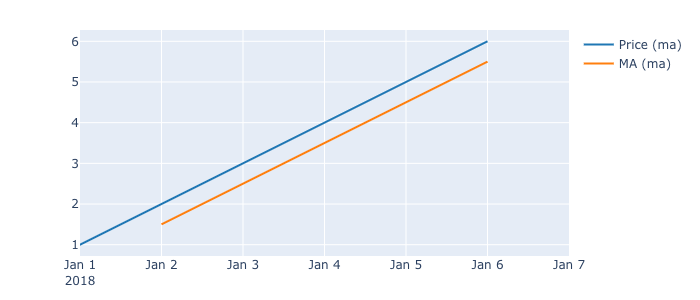

In [7]:
ma[(2, False, 'a')].plot().show_png()

## DMAC

In [6]:
print(vbt.DMAC.from_params(ts['a'], 2, 3).fast_ma)
print(vbt.DMAC.from_params(ts, 2, 3).fast_ma)
print(vbt.DMAC.from_params(ts, 2, [3, 4], fast_ewm=False, slow_ewm=False).fast_ma)
print(vbt.DMAC.from_params(ts, 2, [3, 4], fast_ewm=[False, True], slow_ewm=False).fast_ma)
print(vbt.DMAC.from_params(ts, 2, [3, 4], fast_ewm=[False, True], slow_ewm=False, param_product=True).fast_ma)

2018-01-01    NaN
2018-01-02    1.5
2018-01-03    2.5
2018-01-04    3.5
2018-01-05    4.5
2018-01-06    5.5
2018-01-07    NaN
Name: a, dtype: float64
              a    b    c
2018-01-01  NaN  NaN  NaN
2018-01-02  1.5  NaN  1.5
2018-01-03  2.5  5.5  2.5
2018-01-04  3.5  4.5  NaN
2018-01-05  4.5  3.5  NaN
2018-01-06  5.5  2.5  2.5
2018-01-07  NaN  1.5  1.5
dmac_fast_window     2                          
dmac_fast_ewm    False                          
dmac_slow_window     3               4          
dmac_slow_ewm    False           False          
                     a    b    c     a    b    c
2018-01-01         NaN  NaN  NaN   NaN  NaN  NaN
2018-01-02         1.5  NaN  1.5   1.5  NaN  1.5
2018-01-03         2.5  5.5  2.5   2.5  5.5  2.5
2018-01-04         3.5  4.5  NaN   3.5  4.5  NaN
2018-01-05         4.5  3.5  NaN   4.5  3.5  NaN
2018-01-06         5.5  2.5  2.5   5.5  2.5  2.5
2018-01-07         NaN  1.5  1.5   NaN  1.5  1.5
dmac_fast_window     2                                

In [24]:
comb = itertools.combinations(np.arange(2, 10), 2)
fast_windows, slow_windows = np.asarray(list(comb)).transpose()
print(fast_windows, slow_windows)

%timeit vbt.MA.from_params(big_ts, fast_windows), vbt.MA.from_params(big_ts, slow_windows) # naive way
%timeit vbt.DMAC.from_combinations(big_ts, np.arange(2, 10)) # performs caching -> faster

[2 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 5 5 5 5 6 6 6 7 7 8] [3 4 5 6 7 8 9 4 5 6 7 8 9 5 6 7 8 9 6 7 8 9 7 8 9 8 9 9]
834 ms ± 57.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
598 ms ± 6.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
dmac = vbt.DMAC.from_combinations(ts, [2, 3, 4], [False, False, True])

print(dmac.fast_ma)
print(dmac.slow_ma)

dmac_fast_window     2                               3          
dmac_fast_ewm    False                           False          
dmac_slow_window     3               4               4          
dmac_slow_ewm    False           True            True           
                     a    b    c     a    b    c     a    b    c
2018-01-01         NaN  NaN  NaN   NaN  NaN  NaN   NaN  NaN  NaN
2018-01-02         1.5  NaN  1.5   1.5  NaN  1.5   NaN  NaN  NaN
2018-01-03         2.5  5.5  2.5   2.5  5.5  2.5   2.0  NaN  2.0
2018-01-04         3.5  4.5  NaN   3.5  4.5  NaN   3.0  5.0  NaN
2018-01-05         4.5  3.5  NaN   4.5  3.5  NaN   4.0  4.0  NaN
2018-01-06         5.5  2.5  2.5   5.5  2.5  2.5   5.0  3.0  NaN
2018-01-07         NaN  1.5  1.5   NaN  1.5  1.5   NaN  2.0  2.0
dmac_fast_window     2                                                 3  \
dmac_fast_ewm    False                                             False   
dmac_slow_window     3                   4                          

In [26]:
dmac.crossover()

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/utils.py:1314: RuntimeWarning:

invalid value encountered in greater

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/utils.py:1314: RuntimeWarning:

invalid value encountered in less



(dmac_fast_window      2                                         3         \
 dmac_fast_ewm     False                                     False          
 dmac_slow_window      3                    4                    4          
 dmac_slow_ewm     False                True                 True           
                       a      b      c      a      b      c      a      b   
 2018-01-01        False  False  False  False  False  False  False  False   
 2018-01-02        False  False  False  False  False  False  False  False   
 2018-01-03         True  False   True  False  False  False  False  False   
 2018-01-04        False  False  False   True  False  False  False   True   
 2018-01-05        False  False  False  False  False  False   True  False   
 2018-01-06        False  False  False  False  False   True  False  False   
 2018-01-07        False  False  False  False  False  False  False  False   
 
 dmac_fast_window         
 dmac_fast_ewm            
 dmac_slow_window   

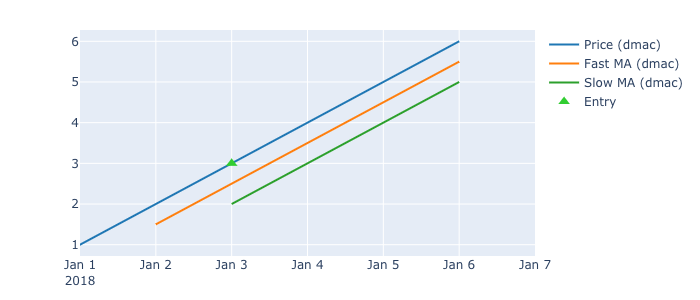

In [9]:
dmac[(2, False, 3, False, 'a')].plot().show_png()

## MSTD

In [7]:
print(vbt.MSTD.from_params(ts['a'], 2).mstd)
print(vbt.MSTD.from_params(ts, 2).mstd)
print(vbt.MSTD.from_params(ts, [2, 3], ewm=False).mstd)
print(vbt.MSTD.from_params(ts, [2, 3], ewm=[False, True]).mstd)
print(vbt.MSTD.from_params(ts, [2, 3], ewm=[False, True], param_product=True).mstd)

2018-01-01         NaN
2018-01-02    0.707107
2018-01-03    0.707107
2018-01-04    0.707107
2018-01-05    0.707107
2018-01-06    0.707107
2018-01-07         NaN
Name: a, dtype: float64
                   a         b         c
2018-01-01       NaN       NaN       NaN
2018-01-02  0.707107       NaN  0.707107
2018-01-03  0.707107  0.707107  0.707107
2018-01-04  0.707107  0.707107       NaN
2018-01-05  0.707107  0.707107       NaN
2018-01-06  0.707107  0.707107  0.707107
2018-01-07       NaN  0.707107  0.707107
mstd_window         2                         3          
mstd_ewm        False                     False          
                    a         b         c     a    b    c
2018-01-01        NaN       NaN       NaN   NaN  NaN  NaN
2018-01-02   0.707107       NaN  0.707107   NaN  NaN  NaN
2018-01-03   0.707107  0.707107  0.707107   1.0  NaN  1.0
2018-01-04   0.707107  0.707107       NaN   1.0  1.0  NaN
2018-01-05   0.707107  0.707107       NaN   1.0  1.0  NaN
2018-01-06   0.707107  

In [29]:
# One window
%timeit big_ts.rolling(2).std()
%timeit vbt.MSTD.from_params(big_ts, 2)

print(vbt.MSTD.from_params(big_ts, 2).mstd.shape)

57.8 ms ± 5.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
26 ms ± 622 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


In [30]:
# Multiple windows
%timeit pd.concat([big_ts.rolling(i).std() for i in np.arange(2, 100)])
%timeit vbt.MSTD.from_params(big_ts, np.arange(2, 100))

print(vbt.MSTD.from_params(big_ts, np.arange(2, 100)).mstd.shape)

6.1 s ± 24.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.03 s ± 9.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 98000)


In [31]:
# One window repeated
%timeit vbt.MA.from_params(big_ts, np.full(100, 2))

print(vbt.MSTD.from_params(big_ts, np.full(100, 2)).mstd.shape)

1.07 s ± 86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 100000)


In [10]:
mstd = vbt.MSTD.from_params(ts, [2, 3], [False, True])

print(mstd.mstd)

mstd_window         2                             3                    
mstd_ewm        False                         True                     
                    a         b         c         a         b         c
2018-01-01        NaN       NaN       NaN       NaN       NaN       NaN
2018-01-02   0.707107       NaN  0.707107       NaN       NaN       NaN
2018-01-03   0.707107  0.707107  0.707107  0.963624  0.707107  0.963624
2018-01-04   0.707107  0.707107       NaN  1.177164  0.963624  0.963624
2018-01-05   0.707107  0.707107       NaN  1.345243  1.177164  0.695792
2018-01-06   0.707107  0.707107  0.707107  1.470916  1.345243  0.678643
2018-01-07        NaN  0.707107  0.707107  1.470916  1.470916  0.960778


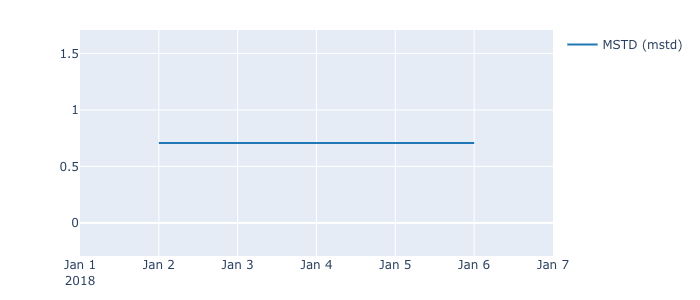

In [11]:
mstd[(2, False, 'a')].plot().show_png()

## BollingerBands

In [8]:
print(vbt.BollingerBands.from_params(ts, window=2, alpha=1).middle_band)
print(vbt.BollingerBands.from_params(ts, window=[2, 3], ewm=False, alpha=1.5).middle_band)
print(vbt.BollingerBands.from_params(ts, window=[2, 3], ewm=[False, True], alpha=[1, 2]).middle_band)
print(vbt.BollingerBands.from_params(ts, window=[2, 3], ewm=[False, True], alpha=[1, 2], param_product=True).middle_band)

              a    b    c
2018-01-01  NaN  NaN  NaN
2018-01-02  1.5  NaN  1.5
2018-01-03  2.5  5.5  2.5
2018-01-04  3.5  4.5  NaN
2018-01-05  4.5  3.5  NaN
2018-01-06  5.5  2.5  2.5
2018-01-07  NaN  1.5  1.5
bb_window      2               3          
bb_ewm     False           False          
bb_alpha     1.5             1.5          
               a    b    c     a    b    c
2018-01-01   NaN  NaN  NaN   NaN  NaN  NaN
2018-01-02   1.5  NaN  1.5   NaN  NaN  NaN
2018-01-03   2.5  5.5  2.5   2.0  NaN  2.0
2018-01-04   3.5  4.5  NaN   3.0  5.0  NaN
2018-01-05   4.5  3.5  NaN   4.0  4.0  NaN
2018-01-06   5.5  2.5  2.5   5.0  3.0  NaN
2018-01-07   NaN  1.5  1.5   NaN  2.0  2.0
bb_window      2                   3                    
bb_ewm     False               True                     
bb_alpha     1.0                 2.0                    
               a    b    c         a         b         c
2018-01-01   NaN  NaN  NaN       NaN       NaN       NaN
2018-01-02   1.5  NaN  1.5       N

In [35]:
# One window
%timeit vbt.BollingerBands.from_params(big_ts)

print(vbt.BollingerBands.from_params(big_ts).ts.shape)

56.3 ms ± 3.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 1000)


In [36]:
# Multiple windows
%timeit vbt.BollingerBands.from_params(big_ts, window=np.arange(2, 100))

print(vbt.BollingerBands.from_params(big_ts, window=np.arange(2, 100)).ts.shape)

8.98 s ± 1.35 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 98000)


In [37]:
# One window repeated
%timeit vbt.BollingerBands.from_params(big_ts, window=np.full(100, 2))

print(vbt.BollingerBands.from_params(big_ts, window=np.full(100, 2)).ts.shape)

2.92 s ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 100000)


In [12]:
bb = vbt.BollingerBands.from_params(ts, window=2, alpha=[1., 2.], ewm=False)

print(bb.upper_band)
print()
print(bb.middle_band)
print()
print(bb.lower_band)
print()
print(bb.percent_b)
print()
print(bb.bandwidth)

bb_window          2                                                  
bb_ewm         False                                                  
bb_alpha         1.0                           2.0                    
                   a         b         c         a         b         c
2018-01-01       NaN       NaN       NaN       NaN       NaN       NaN
2018-01-02  2.207107       NaN  2.207107  2.914214       NaN  2.914214
2018-01-03  3.207107  6.207107  3.207107  3.914214  6.914214  3.914214
2018-01-04  4.207107  5.207107       NaN  4.914214  5.914214       NaN
2018-01-05  5.207107  4.207107       NaN  5.914214  4.914214       NaN
2018-01-06  6.207107  3.207107  3.207107  6.914214  3.914214  3.914214
2018-01-07       NaN  2.207107  2.207107       NaN  2.914214  2.914214

bb_window      2                         
bb_ewm     False                         
bb_alpha     1.0            2.0          
               a    b    c    a    b    c
2018-01-01   NaN  NaN  NaN  NaN  NaN  NaN
2018-01-

In [39]:
print(bb.ts_below(bb.upper_band) & bb.ts_above(bb.lower_band)) # price between bands

bb_window       2                                   
bb_ewm      False                                   
bb_alpha      1.0                  2.0              
                a      b      c      a      b      c
2018-01-01  False  False  False  False  False  False
2018-01-02   True  False   True   True  False   True
2018-01-03   True   True   True   True   True   True
2018-01-04   True   True  False   True   True  False
2018-01-05   True   True  False   True   True  False
2018-01-06   True   True   True   True   True   True
2018-01-07  False   True   True  False   True   True


/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/utils.py:1314: RuntimeWarning:

invalid value encountered in less

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/utils.py:1314: RuntimeWarning:

invalid value encountered in greater



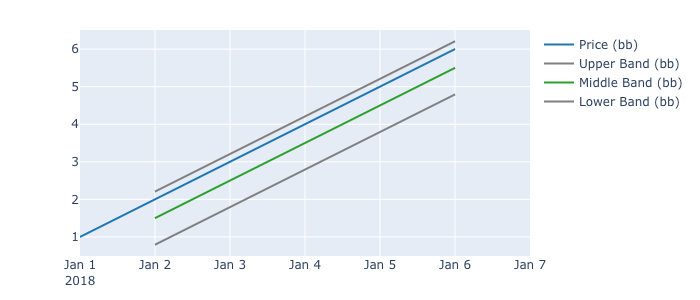

In [13]:
bb[(2, False, 1., 'a')].plot().show_png()

## RSI

In [9]:
print(vbt.RSI.from_params(ts['a'], window=2).rsi)
print(vbt.RSI.from_params(ts, window=2).rsi)
print(vbt.RSI.from_params(ts, window=[2, 3], ewm=False).rsi)
print(vbt.RSI.from_params(ts, window=[2, 3], ewm=[False, True]).rsi)
print(vbt.RSI.from_params(ts, window=[2, 3], ewm=[False, True], param_product=True).rsi)

2018-01-01      NaN
2018-01-02      NaN
2018-01-03    100.0
2018-01-04    100.0
2018-01-05    100.0
2018-01-06    100.0
2018-01-07      NaN
Name: a, dtype: float64
                a    b      c
2018-01-01    NaN  NaN    NaN
2018-01-02    NaN  NaN    NaN
2018-01-03  100.0  NaN  100.0
2018-01-04  100.0  0.0    NaN
2018-01-05  100.0  0.0    NaN
2018-01-06  100.0  0.0    NaN
2018-01-07    NaN  0.0    0.0
rsi_window      2                  3         
rsi_ewm     False              False         
                a    b      c      a    b   c
2018-01-01    NaN  NaN    NaN    NaN  NaN NaN
2018-01-02    NaN  NaN    NaN    NaN  NaN NaN
2018-01-03  100.0  NaN  100.0    NaN  NaN NaN
2018-01-04  100.0  0.0    NaN  100.0  NaN NaN
2018-01-05  100.0  0.0    NaN  100.0  0.0 NaN
2018-01-06  100.0  0.0    NaN  100.0  0.0 NaN
2018-01-07    NaN  0.0    0.0    NaN  0.0 NaN
rsi_window      2                  3                 
rsi_ewm     False              True                  
                a    b      

In [42]:
# One window
%timeit vbt.RSI.from_params(big_ts, window=2)

print(vbt.RSI.from_params(big_ts, window=2).rsi.shape)

66.9 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


In [43]:
# Multiple windows
%timeit vbt.RSI.from_params(big_ts, window=np.arange(2, 100))

print(vbt.RSI.from_params(big_ts, window=np.arange(2, 100)).rsi.shape)

5.77 s ± 492 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 98000)


In [44]:
# One window repeated
%timeit vbt.RSI.from_params(big_ts, window=np.full(100, 2))

print(vbt.RSI.from_params(big_ts, window=np.full(100, 2)).rsi.shape)

1.61 s ± 43.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 100000)


In [14]:
rsi = vbt.RSI.from_params(ts, window=[2, 3], ewm=[False, True])

print(rsi.rsi)

rsi_window      2                  3                 
rsi_ewm     False              True                  
                a    b      c      a    b           c
2018-01-01    NaN  NaN    NaN    NaN  NaN         NaN
2018-01-02    NaN  NaN    NaN    NaN  NaN         NaN
2018-01-03  100.0  NaN  100.0    NaN  NaN         NaN
2018-01-04  100.0  0.0    NaN  100.0  0.0  100.000000
2018-01-05  100.0  0.0    NaN  100.0  0.0  100.000000
2018-01-06  100.0  0.0    NaN  100.0  0.0   15.789474
2018-01-07    NaN  0.0    0.0  100.0  0.0    5.882353


In [46]:
print(rsi.rsi_above(70))

rsi_window      2                    3              
rsi_ewm     False                True               
                a      b      c      a      b      c
2018-01-01  False  False  False  False  False  False
2018-01-02  False  False  False  False  False  False
2018-01-03   True  False   True  False  False  False
2018-01-04   True  False  False   True  False   True
2018-01-05   True  False  False   True  False   True
2018-01-06   True  False  False   True  False  False
2018-01-07  False  False  False   True  False  False


/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/utils.py:1314: RuntimeWarning:

invalid value encountered in greater



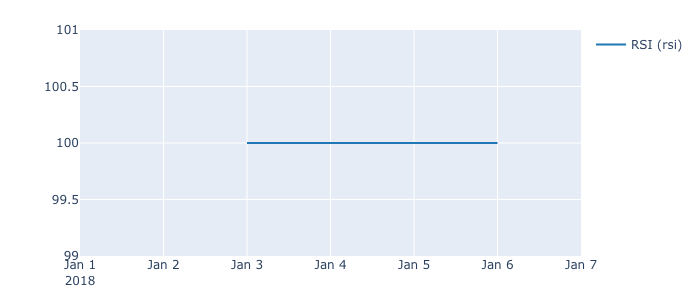

In [15]:
rsi[(2, False, 'a')].plot().show_png()

## Stochastic

In [10]:
print(vbt.Stochastic.from_params(ts['a'], k_window=2, d_window=3, ewm=False).percent_d)
print(vbt.Stochastic.from_params(ts['a'], high_ts=ts['a']*1.1, low_ts=ts['a']*0.9, k_window=2, d_window=3).percent_d)
print(vbt.Stochastic.from_params(ts, k_window=2, d_window=3).percent_d)
print(vbt.Stochastic.from_params(ts, k_window=2, d_window=[2, 3]).percent_d)
print(vbt.Stochastic.from_params(ts, k_window=[2, 3], d_window=[2, 3]).percent_d)
print(vbt.Stochastic.from_params(ts, k_window=[2, 3], d_window=[2, 3], param_product=True).percent_d)

2018-01-01      NaN
2018-01-02      NaN
2018-01-03      NaN
2018-01-04    100.0
2018-01-05    100.0
2018-01-06    100.0
2018-01-07      NaN
Name: a, dtype: float64
2018-01-01          NaN
2018-01-02          NaN
2018-01-03          NaN
2018-01-04    80.361991
2018-01-05    76.718266
2018-01-06    73.861123
2018-01-07          NaN
Name: a, dtype: float64
                a    b   c
2018-01-01    NaN  NaN NaN
2018-01-02    NaN  NaN NaN
2018-01-03    NaN  NaN NaN
2018-01-04  100.0  NaN NaN
2018-01-05  100.0  0.0 NaN
2018-01-06  100.0  0.0 NaN
2018-01-07    NaN  0.0 NaN
stoch_k_window      2                            
stoch_d_window      2                  3         
stoch_ewm       False              False         
                    a    b      c      a    b   c
2018-01-01        NaN  NaN    NaN    NaN  NaN NaN
2018-01-02        NaN  NaN    NaN    NaN  NaN NaN
2018-01-03      100.0  NaN  100.0    NaN  NaN NaN
2018-01-04      100.0  0.0    NaN  100.0  NaN NaN
2018-01-05      100.0  0.0  

In [49]:
# One window
%timeit vbt.Stochastic.from_params(big_ts, k_window=2)

print(vbt.Stochastic.from_params(big_ts, k_window=2).percent_d.shape)

69 ms ± 4.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


In [50]:
# Multiple windows
%timeit vbt.Stochastic.from_params(big_ts, k_window=np.arange(2, 100)) # rolling min/max very expensive

print(vbt.Stochastic.from_params(big_ts, k_window=np.arange(2, 100)).percent_d.shape)

26 s ± 199 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 98000)


In [51]:
# One window repeated
%timeit vbt.Stochastic.from_params(big_ts, k_window=np.full(100, 2))

print(vbt.Stochastic.from_params(big_ts, k_window=np.full(100, 2)).percent_d.shape)

5.94 s ± 88.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 100000)


In [16]:
stochastic = vbt.Stochastic.from_params(ts, high_ts=ts*1.1, low_ts=ts*0.9, k_window=[2, 4], d_window=2, ewm=[False, True])

print(stochastic.percent_k)
print(stochastic.percent_d)

stoch_k_window          2                                4              
stoch_d_window          2                                2              
stoch_ewm           False                            True               
                        a          b          c          a         b   c
2018-01-01            NaN        NaN        NaN        NaN       NaN NaN
2018-01-02      84.615385        NaN  84.615385        NaN       NaN NaN
2018-01-03      80.000000  23.809524  80.000000        NaN       NaN NaN
2018-01-04      76.470588  21.052632        NaN  88.571429       NaN NaN
2018-01-05      73.684211  17.647059        NaN  86.486486  7.692308 NaN
2018-01-06      71.428571  13.333333  13.333333  84.615385  5.405405 NaN
2018-01-07            NaN   7.692308   7.692308        NaN  2.857143 NaN
stoch_k_window          2                                4              
stoch_d_window          2                                2              
stoch_ewm           False                          

In [17]:
stochastic.crossover()

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/utils.py:1314: RuntimeWarning:

invalid value encountered in greater

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/utils.py:1314: RuntimeWarning:

invalid value encountered in less



(stoch_k_window      2                    4              
 stoch_d_window      2                    2              
 stoch_ewm       False                True               
                     a      b      c      a      b      c
 2018-01-01      False  False  False  False  False  False
 2018-01-02      False  False  False  False  False  False
 2018-01-03      False  False  False  False  False  False
 2018-01-04      False  False  False  False  False  False
 2018-01-05      False  False  False  False  False  False
 2018-01-06      False  False  False  False  False  False
 2018-01-07      False  False  False  False  False  False,
 stoch_k_window      2                    4              
 stoch_d_window      2                    2              
 stoch_ewm       False                True               
                     a      b      c      a      b      c
 2018-01-01      False  False  False  False  False  False
 2018-01-02      False  False  False  False  False  False
 2018-01-03  

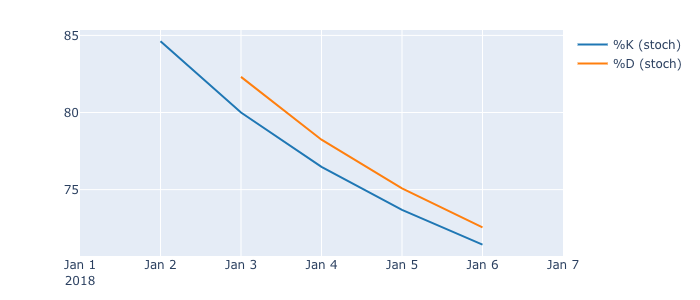

In [18]:
stochastic[(2, 2, False, 'a')].plot().show_png()

## MACD

In [11]:
print(vbt.MACD.from_params(ts['a'], fast_window=2, slow_window=4, signal_window=2, ewm=True).macd)
print(vbt.MACD.from_params(ts, fast_window=2, slow_window=4, signal_window=2, ewm=True).macd)
print(vbt.MACD.from_params(ts, fast_window=[2, 3], slow_window=4, signal_window=2, ewm=True).macd)
print(vbt.MACD.from_params(ts, fast_window=[2, 3], slow_window=4, signal_window=2, ewm=[False, True], param_product=True).macd)

2018-01-01         NaN
2018-01-02         NaN
2018-01-03         NaN
2018-01-04    0.454412
2018-01-05    0.599079
2018-01-06    0.714606
2018-01-07    0.714606
Name: a, dtype: float64
                   a         b         c
2018-01-01       NaN       NaN       NaN
2018-01-02       NaN       NaN       NaN
2018-01-03       NaN       NaN       NaN
2018-01-04  0.454412 -0.288854  0.288854
2018-01-05  0.599079 -0.454412  0.225420
2018-01-06  0.714606 -0.599079 -0.100763
2018-01-07  0.714606 -0.714606 -0.348771
macd_fast_window           2                             3                    
macd_slow_window           4                             4                    
macd_signal_window         2                             2                    
macd_ewm                True                          True                    
                           a         b         c         a         b         c
2018-01-01               NaN       NaN       NaN       NaN       NaN       NaN
2018-01-02   

In [56]:
# One window
%timeit vbt.MACD.from_params(big_ts, fast_window=2)

print(vbt.MACD.from_params(big_ts, fast_window=2).macd.shape)

70.1 ms ± 913 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


In [57]:
# Multiple windows
%timeit vbt.MACD.from_params(big_ts, fast_window=np.arange(2, 100))

print(vbt.MACD.from_params(big_ts, fast_window=np.arange(2, 100)).macd.shape)

6.22 s ± 258 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 98000)


In [58]:
# One window repeated
%timeit vbt.MACD.from_params(big_ts, fast_window=np.full(100, 2))

print(vbt.MACD.from_params(big_ts, fast_window=np.full(100, 2)).macd.shape)

5.17 s ± 600 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000, 100000)


In [19]:
macd = vbt.MACD.from_params(ts, fast_window=[2, 3], slow_window=4, signal_window=2, ewm=True)

print(macd.fast_ma)
print(macd.slow_ma)
print(macd.macd)
print(macd.signal)
print(macd.histogram)

macd_fast_window           2                             3                    
macd_slow_window           4                             4                    
macd_signal_window         2                             2                    
macd_ewm                True                          True                    
                           a         b         c         a         b         c
2018-01-01               NaN       NaN       NaN       NaN       NaN       NaN
2018-01-02          1.750000  6.000000  1.750000       NaN       NaN       NaN
2018-01-03          2.615385  5.250000  2.615385  2.428571  5.333333  2.428571
2018-01-04          3.550000  4.384615  2.615385  3.266667  4.571429  2.428571
2018-01-05          4.520661  3.450000  2.946809  4.161290  3.733333  2.826087
2018-01-06          5.508242  2.479339  2.264095  5.095238  2.838710  2.345455
2018-01-07          5.508242  1.491758  1.399625  5.095238  1.904762  1.621849
macd_fast_window           2                        

In [20]:
macd.crossover()

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/utils.py:1314: RuntimeWarning:

invalid value encountered in greater

/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/utils.py:1314: RuntimeWarning:

invalid value encountered in less



(macd_fast_window        2                    3              
 macd_slow_window        4                    4              
 macd_signal_window      2                    2              
 macd_ewm             True                 True              
                         a      b      c      a      b      c
 2018-01-01          False  False  False  False  False  False
 2018-01-02          False  False  False  False  False  False
 2018-01-03          False  False  False  False  False  False
 2018-01-04          False  False  False  False  False  False
 2018-01-05           True  False  False   True  False   True
 2018-01-06          False  False  False  False  False  False
 2018-01-07          False  False  False  False  False  False,
 macd_fast_window        2                    3              
 macd_slow_window        4                    4              
 macd_signal_window      2                    2              
 macd_ewm             True                 True              
       

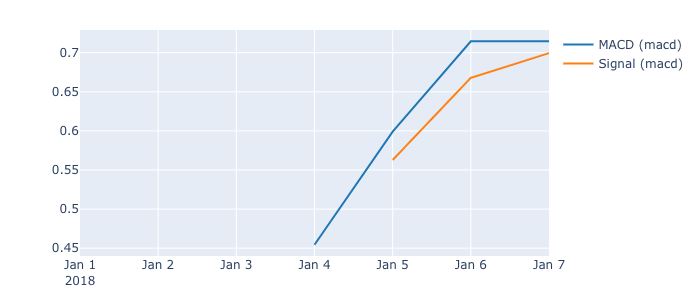

In [21]:
macd[(2, 4, 2, True, 'a')].plot().show_png()

## OBV

In [5]:
print(vbt.OBV.from_params(ts['a'], ts['b']).obv)
print(vbt.OBV.from_params(ts['a'], ts).obv)
print(vbt.OBV.from_params(ts, ts['b']).obv)
print(vbt.OBV.from_params(ts, ts.iloc[:, ::-1]).obv)

2018-01-01     NaN
2018-01-02     6.0
2018-01-03    11.0
2018-01-04    15.0
2018-01-05    18.0
2018-01-06    20.0
2018-01-07     NaN
Name: (a, b), dtype: float64
               a     b     c
2018-01-01   NaN   NaN   NaN
2018-01-02   2.0   6.0   2.0
2018-01-03   5.0  11.0   5.0
2018-01-04   9.0  15.0   NaN
2018-01-05  14.0  18.0   8.0
2018-01-06  20.0  20.0  10.0
2018-01-07   NaN   NaN   NaN
               a     b     c
2018-01-01   NaN   NaN   NaN
2018-01-02   6.0   NaN   6.0
2018-01-03  11.0  -5.0  11.0
2018-01-04  15.0  -9.0   NaN
2018-01-05  18.0 -12.0   NaN
2018-01-06  20.0 -14.0   9.0
2018-01-07   NaN -15.0   8.0
               a     b    c
               c     b    a
2018-01-01   NaN   NaN  NaN
2018-01-02   2.0   NaN  2.0
2018-01-03   5.0  -5.0  5.0
2018-01-04   NaN  -9.0  NaN
2018-01-05   8.0 -12.0  NaN
2018-01-06  10.0 -14.0 -1.0
2018-01-07   NaN -15.0  NaN


In [6]:
%timeit vbt.OBV.from_params(big_ts, big_ts.iloc[:, ::-1])

print(vbt.OBV.from_params(big_ts, big_ts.iloc[:, ::-1]).obv.shape)

24.5 ms ± 6.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000, 1000)


In [7]:
obv = vbt.OBV.from_params(ts, ts.iloc[:, ::-1])

print(obv.obv)

               a     b    c
               c     b    a
2018-01-01   NaN   NaN  NaN
2018-01-02   2.0   NaN  2.0
2018-01-03   5.0  -5.0  5.0
2018-01-04   NaN  -9.0  NaN
2018-01-05   8.0 -12.0  NaN
2018-01-06  10.0 -14.0 -1.0
2018-01-07   NaN -15.0  NaN


In [8]:
print(obv.obv_above([0, 5], multiple=True))

obv_above       0                    5              
                a      b      c      a      b      c
                c      b      a      c      b      a
2018-01-01  False  False  False  False  False  False
2018-01-02   True  False   True  False  False  False
2018-01-03   True  False   True  False  False  False
2018-01-04  False  False  False  False  False  False
2018-01-05   True  False  False   True  False  False
2018-01-06   True  False  False   True  False  False
2018-01-07  False  False  False  False  False  False


/Users/olegpolakow/Documents/SourceTree/vectorbt/vectorbt/utils.py:1095: RuntimeWarning:

invalid value encountered in greater



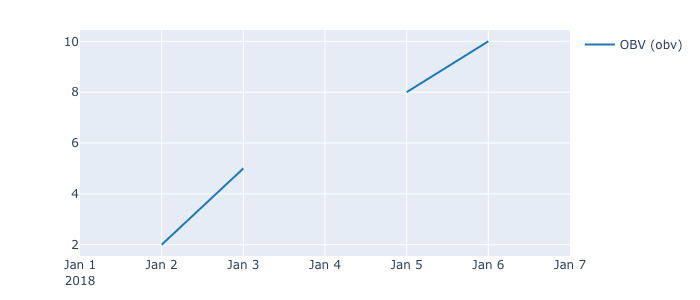

In [10]:
obv[('a', 'c')].plot().show_png()

## IndicatorFactory

### from_custom_func

In [13]:
def apply_func(i, ts, p, a, b=100):
    return ts * p[i] + a + b

@njit
def apply_func_nb(i, ts, p, a):
    return ts * p[i] + a + 100 # numba doesn't support **kwargs

# Custom function can be anything that takes time series, params and other arguments, and returns outputs
def custom_func(ts, p, *args, **kwargs):
    return apply_and_concat_one(len(p), apply_func, ts.vbt.to_2d_array(), p, *args, **kwargs)

def custom_func_nb(ts, p, *args):
    return apply_and_concat_one_nb(len(p), apply_func_nb, ts.vbt.to_2d_array(), p, *args)

print(vbt.IndicatorFactory().from_custom_func(custom_func)\
      .from_params(ts, [0, 1, 2], 10, b=100).output)
print(vbt.IndicatorFactory().from_custom_func(custom_func_nb)\
      .from_params(ts, [0, 1, 2], 10).output)

custom_param      0                    1                    2              
                  a      b      c      a      b      c      a      b      c
2018-01-01    110.0    NaN  110.0  111.0    NaN  111.0  112.0    NaN  112.0
2018-01-02    110.0  110.0  110.0  112.0  116.0  112.0  114.0  122.0  114.0
2018-01-03    110.0  110.0  110.0  113.0  115.0  113.0  116.0  120.0  116.0
2018-01-04    110.0  110.0    NaN  114.0  114.0    NaN  118.0  118.0    NaN
2018-01-05    110.0  110.0  110.0  115.0  113.0  113.0  120.0  116.0  116.0
2018-01-06    110.0  110.0  110.0  116.0  112.0  112.0  122.0  114.0  114.0
2018-01-07      NaN  110.0  110.0    NaN  111.0  111.0    NaN  112.0  112.0
custom_param      0                    1                    2              
                  a      b      c      a      b      c      a      b      c
2018-01-01    110.0    NaN  110.0  111.0    NaN  111.0  112.0    NaN  112.0
2018-01-02    110.0  110.0  110.0  112.0  116.0  112.0  114.0  122.0  114.0
2018-01-03  

### from_apply_func

In [14]:
# Apply function is performed on each parameter individually, and each output is then stacked for you
# Apply functions are less customizable than custom functions, but are simpler to write
print(vbt.IndicatorFactory().from_apply_func(lambda ts, p: ts * p)\
      .from_params(ts, [0, 1, 2]).output)
print(vbt.IndicatorFactory().from_apply_func(njit(lambda ts, p: ts * p))\
      .from_params(ts, [0, 1, 2]).output)

custom_param    0              1               2           
                a    b    c    a    b    c     a     b    c
2018-01-01    0.0  NaN  0.0  1.0  NaN  1.0   2.0   NaN  2.0
2018-01-02    0.0  0.0  0.0  2.0  6.0  2.0   4.0  12.0  4.0
2018-01-03    0.0  0.0  0.0  3.0  5.0  3.0   6.0  10.0  6.0
2018-01-04    0.0  0.0  NaN  4.0  4.0  NaN   8.0   8.0  NaN
2018-01-05    0.0  0.0  0.0  5.0  3.0  3.0  10.0   6.0  6.0
2018-01-06    0.0  0.0  0.0  6.0  2.0  2.0  12.0   4.0  4.0
2018-01-07    NaN  0.0  0.0  NaN  1.0  1.0   NaN   2.0  2.0
custom_param    0              1               2           
                a    b    c    a    b    c     a     b    c
2018-01-01    0.0  NaN  0.0  1.0  NaN  1.0   2.0   NaN  2.0
2018-01-02    0.0  0.0  0.0  2.0  6.0  2.0   4.0  12.0  4.0
2018-01-03    0.0  0.0  0.0  3.0  5.0  3.0   6.0  10.0  6.0
2018-01-04    0.0  0.0  NaN  4.0  4.0  NaN   8.0   8.0  NaN
2018-01-05    0.0  0.0  0.0  5.0  3.0  3.0  10.0   6.0  6.0
2018-01-06    0.0  0.0  0.0  6.0  2.0  2

In [15]:
print(vbt.IndicatorFactory(ts_names=['ts1', 'ts2']).from_apply_func(lambda ts1, ts2, p: ts1 * ts2 * p)\
      .from_params(ts, ts+1, [0, 1, 2]).output) # test multiple ts
print(vbt.IndicatorFactory(ts_names=['ts1', 'ts2']).from_apply_func(njit(lambda ts1, ts2, p: ts1 * ts2 * p))\
      .from_params(ts, ts+1, [0, 1, 2]).output)

custom_param    0               1                 2            
                a    b    c     a     b     c     a     b     c
2018-01-01    0.0  NaN  0.0   2.0   NaN   2.0   4.0   NaN   4.0
2018-01-02    0.0  0.0  0.0   6.0  42.0   6.0  12.0  84.0  12.0
2018-01-03    0.0  0.0  0.0  12.0  30.0  12.0  24.0  60.0  24.0
2018-01-04    0.0  0.0  NaN  20.0  20.0   NaN  40.0  40.0   NaN
2018-01-05    0.0  0.0  0.0  30.0  12.0  12.0  60.0  24.0  24.0
2018-01-06    0.0  0.0  0.0  42.0   6.0   6.0  84.0  12.0  12.0
2018-01-07    NaN  0.0  0.0   NaN   2.0   2.0   NaN   4.0   4.0
custom_param    0               1                 2            
                a    b    c     a     b     c     a     b     c
2018-01-01    0.0  NaN  0.0   2.0   NaN   2.0   4.0   NaN   4.0
2018-01-02    0.0  0.0  0.0   6.0  42.0   6.0  12.0  84.0  12.0
2018-01-03    0.0  0.0  0.0  12.0  30.0  12.0  24.0  60.0  24.0
2018-01-04    0.0  0.0  NaN  20.0  20.0   NaN  40.0  40.0   NaN
2018-01-05    0.0  0.0  0.0  30.0  12.0 

In [16]:
print(vbt.IndicatorFactory(param_names=['p1', 'p2']).from_apply_func(lambda ts, p1, p2: ts * (p1 + p2))\
      .from_params(ts, [0, 1], [2, 3]).output) # test multiple params
print(vbt.IndicatorFactory(param_names=['p1', 'p2']).from_apply_func(njit(lambda ts, p1, p2: ts * (p1 + p2)))\
      .from_params(ts, [0, 1], [2, 3]).output)

custom_p1      0                1            
custom_p2      2                3            
               a     b    c     a     b     c
2018-01-01   2.0   NaN  2.0   4.0   NaN   4.0
2018-01-02   4.0  12.0  4.0   8.0  24.0   8.0
2018-01-03   6.0  10.0  6.0  12.0  20.0  12.0
2018-01-04   8.0   8.0  NaN  16.0  16.0   NaN
2018-01-05  10.0   6.0  6.0  20.0  12.0  12.0
2018-01-06  12.0   4.0  4.0  24.0   8.0   8.0
2018-01-07   NaN   2.0  2.0   NaN   4.0   4.0
custom_p1      0                1            
custom_p2      2                3            
               a     b    c     a     b     c
2018-01-01   2.0   NaN  2.0   4.0   NaN   4.0
2018-01-02   4.0  12.0  4.0   8.0  24.0   8.0
2018-01-03   6.0  10.0  6.0  12.0  20.0  12.0
2018-01-04   8.0   8.0  NaN  16.0  16.0   NaN
2018-01-05  10.0   6.0  6.0  20.0  12.0  12.0
2018-01-06  12.0   4.0  4.0  24.0   8.0   8.0
2018-01-07   NaN   2.0  2.0   NaN   4.0   4.0


In [17]:
print(vbt.IndicatorFactory(param_names=['p1', 'p2']).from_apply_func(lambda ts, p1, p2: ts * (p1 + p2))\
      .from_params(ts, [0, 1], [2, 3], param_product=True).output) # test param product
print(vbt.IndicatorFactory(param_names=['p1', 'p2']).from_apply_func(njit(lambda ts, p1, p2: ts * (p1 + p2)))\
      .from_params(ts, [0, 1], [2, 3], param_product=True).output)

custom_p1      0                                 1                         \
custom_p2      2                3                2                3         
               a     b    c     a     b    c     a     b    c     a     b   
2018-01-01   2.0   NaN  2.0   3.0   NaN  3.0   3.0   NaN  3.0   4.0   NaN   
2018-01-02   4.0  12.0  4.0   6.0  18.0  6.0   6.0  18.0  6.0   8.0  24.0   
2018-01-03   6.0  10.0  6.0   9.0  15.0  9.0   9.0  15.0  9.0  12.0  20.0   
2018-01-04   8.0   8.0  NaN  12.0  12.0  NaN  12.0  12.0  NaN  16.0  16.0   
2018-01-05  10.0   6.0  6.0  15.0   9.0  9.0  15.0   9.0  9.0  20.0  12.0   
2018-01-06  12.0   4.0  4.0  18.0   6.0  6.0  18.0   6.0  6.0  24.0   8.0   
2018-01-07   NaN   2.0  2.0   NaN   3.0  3.0   NaN   3.0  3.0   NaN   4.0   

custom_p1         
custom_p2         
               c  
2018-01-01   4.0  
2018-01-02   8.0  
2018-01-03  12.0  
2018-01-04   NaN  
2018-01-05  12.0  
2018-01-06   8.0  
2018-01-07   4.0  
custom_p1      0                       

In [18]:
print(vbt.IndicatorFactory(output_names=['o1', 'o2']).from_apply_func(lambda ts, p: (ts * p, ts * p ** 2))\
      .from_params(ts, [0, 1, 2]).o1) # test multiple outputs
print(vbt.IndicatorFactory(output_names=['o1', 'o2']).from_apply_func(njit(lambda ts, p: (ts * p, ts * p ** 2)))\
      .from_params(ts, [0, 1, 2]).o1)

custom_param    0              1               2           
                a    b    c    a    b    c     a     b    c
2018-01-01    0.0  NaN  0.0  1.0  NaN  1.0   2.0   NaN  2.0
2018-01-02    0.0  0.0  0.0  2.0  6.0  2.0   4.0  12.0  4.0
2018-01-03    0.0  0.0  0.0  3.0  5.0  3.0   6.0  10.0  6.0
2018-01-04    0.0  0.0  NaN  4.0  4.0  NaN   8.0   8.0  NaN
2018-01-05    0.0  0.0  0.0  5.0  3.0  3.0  10.0   6.0  6.0
2018-01-06    0.0  0.0  0.0  6.0  2.0  2.0  12.0   4.0  4.0
2018-01-07    NaN  0.0  0.0  NaN  1.0  1.0   NaN   2.0  2.0
custom_param    0              1               2           
                a    b    c    a    b    c     a     b    c
2018-01-01    0.0  NaN  0.0  1.0  NaN  1.0   2.0   NaN  2.0
2018-01-02    0.0  0.0  0.0  2.0  6.0  2.0   4.0  12.0  4.0
2018-01-03    0.0  0.0  0.0  3.0  5.0  3.0   6.0  10.0  6.0
2018-01-04    0.0  0.0  NaN  4.0  4.0  NaN   8.0   8.0  NaN
2018-01-05    0.0  0.0  0.0  5.0  3.0  3.0  10.0   6.0  6.0
2018-01-06    0.0  0.0  0.0  6.0  2.0  2

In [19]:
print(vbt.IndicatorFactory().from_apply_func(lambda ts, p, a: ts * p + a)\
      .from_params(ts, [0, 1, 2], 3).output) # test *args
print(vbt.IndicatorFactory().from_apply_func(njit(lambda ts, p, a: ts * p + a))\
      .from_params(ts, [0, 1, 2], 3).output)

custom_param    0              1               2           
                a    b    c    a    b    c     a     b    c
2018-01-01    3.0  NaN  3.0  4.0  NaN  4.0   5.0   NaN  5.0
2018-01-02    3.0  3.0  3.0  5.0  9.0  5.0   7.0  15.0  7.0
2018-01-03    3.0  3.0  3.0  6.0  8.0  6.0   9.0  13.0  9.0
2018-01-04    3.0  3.0  NaN  7.0  7.0  NaN  11.0  11.0  NaN
2018-01-05    3.0  3.0  3.0  8.0  6.0  6.0  13.0   9.0  9.0
2018-01-06    3.0  3.0  3.0  9.0  5.0  5.0  15.0   7.0  7.0
2018-01-07    NaN  3.0  3.0  NaN  4.0  4.0   NaN   5.0  5.0
custom_param    0              1               2           
                a    b    c    a    b    c     a     b    c
2018-01-01    3.0  NaN  3.0  4.0  NaN  4.0   5.0   NaN  5.0
2018-01-02    3.0  3.0  3.0  5.0  9.0  5.0   7.0  15.0  7.0
2018-01-03    3.0  3.0  3.0  6.0  8.0  6.0   9.0  13.0  9.0
2018-01-04    3.0  3.0  NaN  7.0  7.0  NaN  11.0  11.0  NaN
2018-01-05    3.0  3.0  3.0  8.0  6.0  6.0  13.0   9.0  9.0
2018-01-06    3.0  3.0  3.0  9.0  5.0  5

In [20]:
print(vbt.IndicatorFactory().from_apply_func(lambda ts, p, a=1: ts * p + a)\
      .from_params(ts, [0, 1, 2], a=3).output) # test **kwargs
# Numba doesn't support kwargs out of the box

custom_param    0              1               2           
                a    b    c    a    b    c     a     b    c
2018-01-01    3.0  NaN  3.0  4.0  NaN  4.0   5.0   NaN  5.0
2018-01-02    3.0  3.0  3.0  5.0  9.0  5.0   7.0  15.0  7.0
2018-01-03    3.0  3.0  3.0  6.0  8.0  6.0   9.0  13.0  9.0
2018-01-04    3.0  3.0  NaN  7.0  7.0  NaN  11.0  11.0  NaN
2018-01-05    3.0  3.0  3.0  8.0  6.0  6.0  13.0   9.0  9.0
2018-01-06    3.0  3.0  3.0  9.0  5.0  5.0  15.0   7.0  7.0
2018-01-07    NaN  3.0  3.0  NaN  4.0  4.0   NaN   5.0  5.0


In [21]:
print(vbt.IndicatorFactory().from_apply_func(lambda ts, param, c: ts * param * c, caching_func=lambda ts, params: 100)\
      .from_params(ts, [0, 1, 2]).output) # test caching func
print(vbt.IndicatorFactory().from_apply_func(njit(lambda ts, param, c: ts * param * c), caching_func=lambda ts, params: 100)\
      .from_params(ts, [0, 1, 2]).output)

custom_param    0                1                     2               
                a    b    c      a      b      c       a       b      c
2018-01-01    0.0  NaN  0.0  100.0    NaN  100.0   200.0     NaN  200.0
2018-01-02    0.0  0.0  0.0  200.0  600.0  200.0   400.0  1200.0  400.0
2018-01-03    0.0  0.0  0.0  300.0  500.0  300.0   600.0  1000.0  600.0
2018-01-04    0.0  0.0  NaN  400.0  400.0    NaN   800.0   800.0    NaN
2018-01-05    0.0  0.0  0.0  500.0  300.0  300.0  1000.0   600.0  600.0
2018-01-06    0.0  0.0  0.0  600.0  200.0  200.0  1200.0   400.0  400.0
2018-01-07    NaN  0.0  0.0    NaN  100.0  100.0     NaN   200.0  200.0
custom_param    0                1                     2               
                a    b    c      a      b      c       a       b      c
2018-01-01    0.0  NaN  0.0  100.0    NaN  100.0   200.0     NaN  200.0
2018-01-02    0.0  0.0  0.0  200.0  600.0  200.0   400.0  1200.0  400.0
2018-01-03    0.0  0.0  0.0  300.0  500.0  300.0   600.0  1000.0